### Image Classification with Convolutional Neural Networks

A CNN begins with one or more sets of convolution layers (CL) and pooling layers (PL)

- Convolution layers extract features from images, generating transformed images that are commonly referred to as feature maps because they highlight distinguishing features such as shapes and contours

- Pooling layers reduce the feature maps' size by half so that the features can be extracted at various resolutions and are less sensitive to small changes in position.

- The CP and LP are called bottleneck layers since they reduce the dimensionality of images input to them.

- Bottleneck layers transform matrices of integer pixel values into tensors of floating-point numbers that better characterize the images input to them

- NPL networks use word embeddings to create **dense vector representations** (DVR) of the words in a document. DVRs are arrays of floating point numbers that do ore to characterize the input than the input data itself

- Conv2D() anatomy
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
        - first_param: number of Convolution Kernels to include in the layer, i.e 32. More kernel, more fitting power
        - second_param: specifies the dimensions of each kernel
        - input_shape: specifies the size of the images input to the CNN

In [1]:
# for Mac OS Sillicon
# pip install tensorflow
# pip install tensorflow-macos
# # pip install tensorflow-metal

### Lets train a CNN to recognize digits in the MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

In [4]:
# lets define a CNN that accepts 28 x 28 x 1 arrays of pixel values as input, contains 2 pairs of CL and PLs, and has a softmax output layer with 10 neurons.

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#model.add(Flatten()) 
# flattening sometimes can lead to over fitting, one way to combat is to introduce a dropout layer, another strategy is to reduce the width of the Dense layer. The third strategy is to replace the Flatten layer with a GlobalAveragePooling2D layer or GlobalMaxPooling2D layer.
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                 │ (None, 26, 26, 32)       │           320 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)    │ (None, 13, 13, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)                 │ (None, 11, 11, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)    │ (None, 5, 5, 64)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d          │ (None, 64)               │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 128)              │         8,320 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 10)               │         1,290 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 28,426 (111.04 KB)

 Trainable params: 28,426 (111.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-11-27 19:23:03.819953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7138 - loss: 0.8763 - val_accuracy: 0.8907 - val_loss: 0.3759
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8869 - loss: 0.3715 - val_accuracy: 0.9156 - val_loss: 0.2822
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9099 - loss: 0.2945 - val_accuracy: 0.9199 - val_loss: 0.2609
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9231 - loss: 0.2520 - val_accuracy: 0.9403 - val_loss: 0.2033
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9303 - loss: 0.2254 - val_accuracy: 0.9435 - val_loss: 0.1914
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9384 - loss: 0.2027 - val_accuracy: 0.9538 - val_loss: 0.1637
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9428 - loss: 0.1881 - val_accuracy: 0.9549 - val_loss: 0.1594
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9441 - loss: 0.18

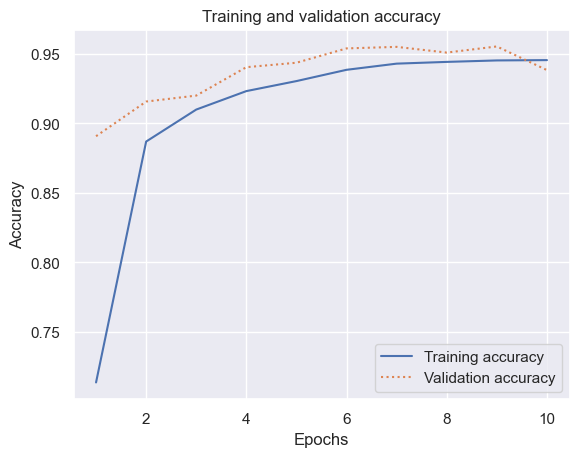

In [5]:
# lets train the network and plot the training and validation accuracy
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, ':', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')